In [1]:
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import accuracy_score
from sys import getsizeof

In [2]:
print(tf.__version__)

2.19.0


In [3]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

In [4]:
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:

np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:

test_images.shape


(10000, 28, 28)

In [11]:

len(test_labels)

10000

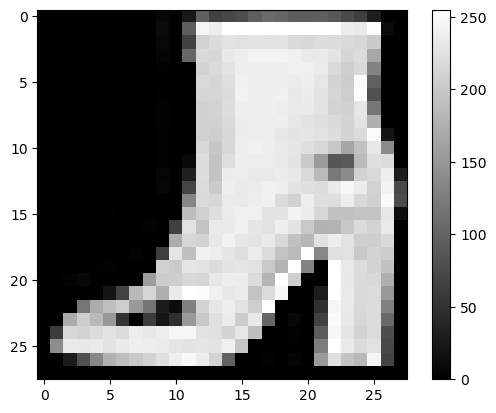

In [12]:

plt.figure()
plt.imshow(train_images[88], cmap="gray")
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [14]:

model = keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10)
])

/opt/anaconda3/envs/ACM1/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:

model.compile(optimizer='adam',
              loss= SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 540us/step - accuracy: 0.7912 - loss: 0.6127
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 538us/step - accuracy: 0.8603 - loss: 0.3929
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 584us/step - accuracy: 0.8765 - loss: 0.3429
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 538us/step - accuracy: 0.8856 - loss: 0.3111
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 534us/step - accuracy: 0.8926 - loss: 0.2948
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 543us/step - accuracy: 0.8934 - loss: 0.2834
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 548us/step - accuracy: 0.9003 - loss: 0.2679
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 530us/step - accuracy: 0.9058 - loss: 0.2545
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 541us/step - accuracy: 0.9073 - loss: 0.2457
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 533us/step - accuracy: 0.9124 - loss: 0.2387


In [18]:
KERAS_MODEL_NAME = "tf_model_fashion_mnist.h5"


In [19]:
model.save(KERAS_MODEL_NAME)


In [20]:
convert_bytes(get_file_size(KERAS_MODEL_NAME), "MB")


File size: 1.187 Megabytes


In [21]:
keras_model_size = get_file_size(KERAS_MODEL_NAME)


In [22]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy is {}%'.format(round(100*test_acc, 2)))

313/313 - 0s - 417us/step - accuracy: 0.8808 - loss: 0.3426

Test accuracy is 88.08%


In [23]:
TF_LITE_MODEL_FILE_NAME = "tf_lite_model.tflite"


In [24]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: /var/folders/s7/ddngkscs167c_65wscck142m0000gr/T/tmpnv8kmief/assets


INFO:tensorflow:Assets written to: /var/folders/s7/ddngkscs167c_65wscck142m0000gr/T/tmpnv8kmief/assets


Saved artifact at '/var/folders/s7/ddngkscs167c_65wscck142m0000gr/T/tmpnv8kmief'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  13196826320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13196827280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13196826704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13196827088: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1743532118.665398  178596 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1743532118.665425  178596 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-04-01 13:28:38.665658: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/s7/ddngkscs167c_65wscck142m0000gr/T/tmpnv8kmief
2025-04-01 13:28:38.665815: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-04-01 13:28:38.665818: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/s7/ddngkscs167c_65wscck142m0000gr/T/tmpnv8kmief
I0000 00:00:1743532118.666780  178596 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2025-04-01 13:28:38.666921: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-04-01 13:28:38.673249: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folder

In [25]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

408812

In [28]:
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "MB")


File size: 0.39 Megabytes


In [29]:
tflite_file_size = get_file_size(TF_LITE_MODEL_FILE_NAME)


In [30]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [ 1 28 28]
Input Type: <class 'numpy.float32'>
Output Shape: [ 1 10]
Output Type: <class 'numpy.float32'>


/opt/anaconda3/envs/ACM1/lib/python3.12/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [31]:
interpreter.resize_tensor_input(input_details[0]['index'], (10000, 28, 28))
interpreter.resize_tensor_input(output_details[0]['index'], (10000, 10))
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [10000    28    28]
Input Type: <class 'numpy.float32'>
Output Shape: [10000    10]
Output Type: <class 'numpy.float32'>


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [32]:
test_images.dtype


dtype('float64')

In [33]:
test_imgs_numpy = np.array(test_images, dtype=np.float32)


In [34]:
test_imgs_numpy.dtype


dtype('float32')

In [35]:
interpreter.set_tensor(input_details[0]['index'], test_imgs_numpy)
interpreter.invoke()
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
print("Prediction results shape:", tflite_model_predictions.shape)
prediction_classes = np.argmax(tflite_model_predictions, axis=1)

Prediction results shape: (10000, 10)


In [36]:
acc = accuracy_score(prediction_classes, test_labels)


In [37]:
print('Test accuracy TFLITE model is {}%'.format(round(100*acc, 2)))


Test accuracy TFLITE model is 88.08%


In [38]:
tflite_file_size/keras_model_size


0.3285044806438756

# TF Lite Model Float 16

In [39]:
TF_LITE_MODEL_FLOAT_16_FILE_NAME = "tf_lite_float_16_model.tflite"
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tf_lite_converter.optimizations = [tf.lite.Optimize.DEFAULT]
tf_lite_converter.target_spec.supported_types = [tf.float16]
tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: /var/folders/s7/ddngkscs167c_65wscck142m0000gr/T/tmple6yzjjc/assets


INFO:tensorflow:Assets written to: /var/folders/s7/ddngkscs167c_65wscck142m0000gr/T/tmple6yzjjc/assets


Saved artifact at '/var/folders/s7/ddngkscs167c_65wscck142m0000gr/T/tmple6yzjjc'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  13196826320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13196827280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13196826704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13196827088: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1743532453.012242  178596 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1743532453.012248  178596 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-04-01 13:34:13.012321: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/s7/ddngkscs167c_65wscck142m0000gr/T/tmple6yzjjc
2025-04-01 13:34:13.012476: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-04-01 13:34:13.012481: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/s7/ddngkscs167c_65wscck142m0000gr/T/tmple6yzjjc
2025-04-01 13:34:13.013668: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-04-01 13:34:13.019906: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folders/s7/ddngkscs167c_65wscck142m0000gr/T/tmple6yzjjc
2025-04-01 13:34:13.022008: I tensorflow/cc/saved_model/loader.cc:

In [40]:
tflite_model_name = TF_LITE_MODEL_FLOAT_16_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

205808

In [41]:
convert_bytes(get_file_size(TF_LITE_MODEL_FLOAT_16_FILE_NAME), "KB")


File size: 200.984 Kilobytes


In [42]:
tflite_float_16_file_size = get_file_size(TF_LITE_MODEL_FLOAT_16_FILE_NAME)


In [43]:
tflite_float_16_file_size/keras_model_size


0.1653788297612466

In [44]:
tflite_float_16_file_size/tflite_file_size


0.5034294492333885

# TF Lite Size Quantized

In [45]:
TF_LITE_SIZE_QUANT_MODEL_FILE_NAME = "tf_lite_quant_model.tflite"


In [46]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tf_lite_converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: /var/folders/s7/ddngkscs167c_65wscck142m0000gr/T/tmpt3bdukzf/assets


INFO:tensorflow:Assets written to: /var/folders/s7/ddngkscs167c_65wscck142m0000gr/T/tmpt3bdukzf/assets


Saved artifact at '/var/folders/s7/ddngkscs167c_65wscck142m0000gr/T/tmpt3bdukzf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  13196826320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13196827280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13196826704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13196827088: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1743532545.248967  178596 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1743532545.248976  178596 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-04-01 13:35:45.249077: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/s7/ddngkscs167c_65wscck142m0000gr/T/tmpt3bdukzf
2025-04-01 13:35:45.249276: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-04-01 13:35:45.249282: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/s7/ddngkscs167c_65wscck142m0000gr/T/tmpt3bdukzf
2025-04-01 13:35:45.250433: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-04-01 13:35:45.257015: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folders/s7/ddngkscs167c_65wscck142m0000gr/T/tmpt3bdukzf
2025-04-01 13:35:45.259392: I tensorflow/cc/saved_model/loader.cc:

In [47]:
tflite_model_name = TF_LITE_SIZE_QUANT_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

105672

In [48]:
convert_bytes(get_file_size(TF_LITE_SIZE_QUANT_MODEL_FILE_NAME), "KB")


File size: 103.195 Kilobytes


In [49]:
tflite_float_quant_file_size = get_file_size(TF_LITE_SIZE_QUANT_MODEL_FILE_NAME)


In [50]:
tflite_float_quant_file_size/keras_model_size


0.08491366564239705

In [51]:
tflite_float_quant_file_size/ tflite_float_16_file_size


0.5134494285936406

# Accuracy of the Quantized Model


# Check Input Tensor Shape


In [52]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_SIZE_QUANT_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [ 1 28 28]
Input Type: <class 'numpy.float32'>
Output Shape: [ 1 10]
Output Type: <class 'numpy.float32'>


/opt/anaconda3/envs/ACM1/lib/python3.12/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


# Resize Tensor Shape


In [54]:
interpreter.resize_tensor_input(input_details[0]['index'], (10000, 28, 28))
interpreter.resize_tensor_input(output_details[0]['index'], (10000, 10))
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [10000    28    28]
Input Type: <class 'numpy.float32'>
Output Shape: [10000    10]
Output Type: <class 'numpy.float32'>


In [55]:
test_images.dtype


dtype('float64')

In [56]:
test_imgs_numpy = np.array(test_images, dtype=np.float32)


In [57]:
interpreter.set_tensor(input_details[0]['index'], test_imgs_numpy)
interpreter.invoke()
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
print("Prediction results shape:", tflite_model_predictions.shape)
prediction_classes = np.argmax(tflite_model_predictions, axis=1)

Prediction results shape: (10000, 10)


In [58]:
acc = accuracy_score(prediction_classes, test_labels)


In [59]:
print('Test accuracy TFLITE Quantized model is {}%'.format(round(100*acc, 2)))


Test accuracy TFLITE Quantized model is 87.98%
